In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("AirPassengers.csv")
data.head(3)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


In [4]:
data['Month'] = pd.to_datetime(data['Month'])
data.index = data['Month']

In [5]:
data.head(2)

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118


In [9]:
del data['Month']

In [10]:
data.head(3)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


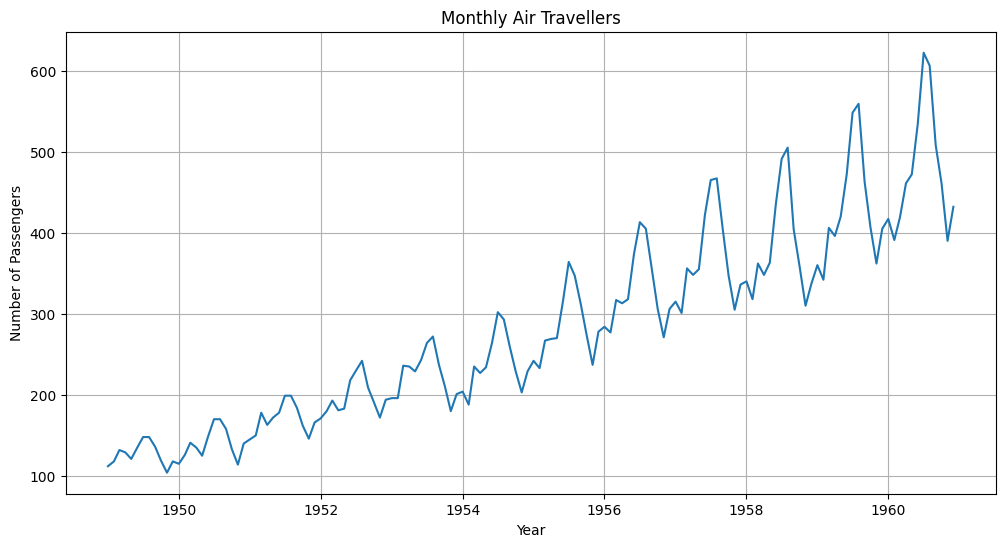

In [26]:
#vis
plt.figure(figsize=(12,6))
plt.plot(data)
plt.title('Monthly Air Travellers')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.grid()

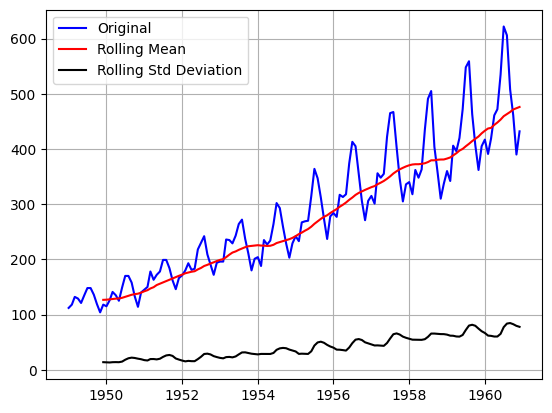

In [31]:
mean_log = data.rolling(window=12).mean()
std_log = data.rolling(window=12).std()

plt.plot(data, color = 'blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='Black', label='Rolling Std Deviation')
plt.legend(loc='best')
plt.grid()

In [37]:
# # Check for stationarity
result = adfuller(data['#Passengers'])

keys = ['test_statistics','p_value','num_logs','num_observation','critical_values','AIC']

for key, value in zip(keys,result):
    print(f"{key}: {value}")

test_statistics: 0.8153688792060482
p_value: 0.991880243437641
num_logs: 13
num_observation: 130
critical_values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}
AIC: 996.692930839019


In [35]:
def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print("ADF Statistics: ", result[0])
    print("p_value: ", result[1])
    print("Critical value: ", result[4])

In [36]:
test_stationarity(data['#Passengers'])

ADF Statistics:  0.8153688792060482
p_value:  0.991880243437641
Critical value:  {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}


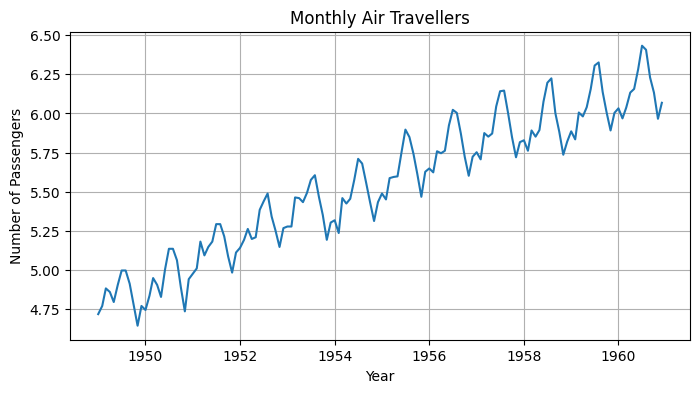

In [42]:
# log transformation

log_data = np.log(data)
plt.figure(figsize=(8,4))
plt.plot(log_data)
plt.title('Monthly Air Travellers')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.grid()

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

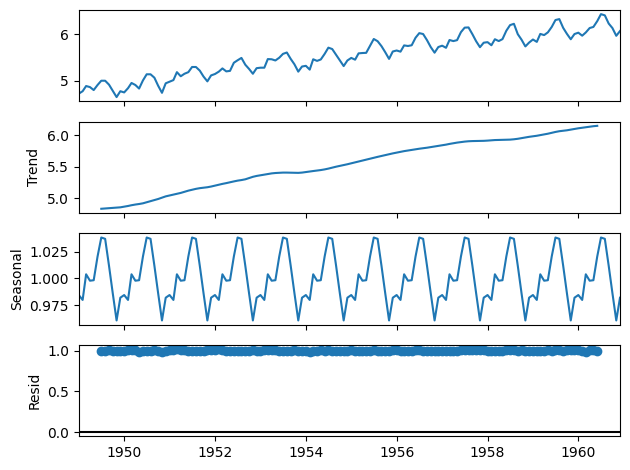

In [45]:
from sklearn import decomposition
decomposition = seasonal_decompose(log_data, model = 'multiplicaative')
fig = decomposition.plot()
plt.tight_layout

ADF Statistics:  -2.717130598388133
p_value:  0.07112054815085875
Critical value:  {'1%': np.float64(-3.4825006939887997), '5%': np.float64(-2.884397984161377), '10%': np.float64(-2.578960197753906)}


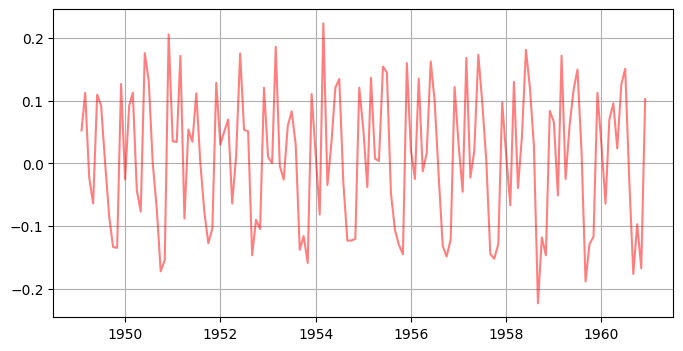

In [74]:
# Removed trend = 0 and seasonality = 0
# Differencing = 1
diff_data = log_data.diff().dropna()
plt.figure(figsize=(8,4))
plt.plot(diff_data, color = 'red', alpha = 0.5)
plt.grid()
test_stationarity(diff_data['#Passengers'])

ADF Statistics:  -8.196629132182231
p_value:  7.419304549376505e-13
Critical value:  {'1%': np.float64(-3.4825006939887997), '5%': np.float64(-2.884397984161377), '10%': np.float64(-2.578960197753906)}


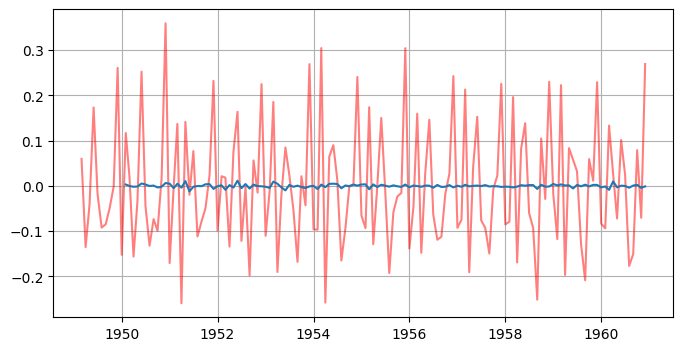

In [75]:
# Removed trend = 0 and seasonality = 0 
# Differencing = 2
mean2_log = diff2_data.rolling(window=12).mean()
diff2_data = diff_data.diff().dropna()
plt.figure(figsize=(8,4))
plt.plot(diff2_data, color = 'red', alpha = 0.5)
plt.plot(mean2_log)
plt.grid()
test_stationarity(diff2_data['#Passengers'])

In [76]:
# PLot acf and pacf plots

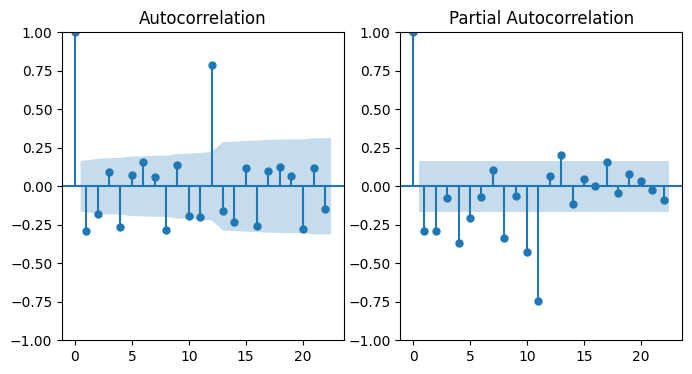

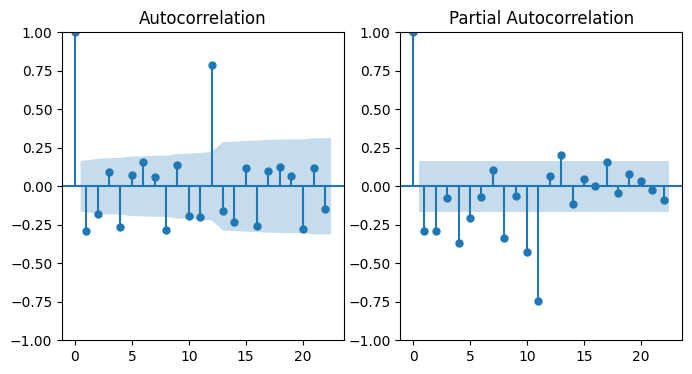

In [81]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,4))
plot_acf(diff2_data, ax = ax1)
plot_pacf(diff2_data, ax = ax2)

In [83]:
log_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #Passengers  144 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [84]:
train = log_data[:132]
test = log_data[132:]

In [94]:
arima_model = ARIMA(train, order = (2,2,1))
arima_result  = arima_model.fit()
print(arima_result.summary())

#forecast
arima_forecast = arima_result.forecast(steps = len(test))
arima_forecast = np.exp(arima_forecast)


C:\Users\karan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  132
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 108.577
Date:                Tue, 13 Jan 2026   AIC                           -209.153
Time:                        11:30:27   BIC                           -197.683
Sample:                    01-01-1949   HQIC                          -204.492
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2290      0.109      2.092      0.036       0.014       0.443
ar.L2         -0.1661      0.111     -1.494      0.135      -0.384       0.052
ma.L1         -0.9999     26.408     -0.038      0.9

In [98]:
sarimax_model = SARIMAX(train, order = (2,1,1), seasonal_order = (2,1,1,12))
sarimax_result  = sarimax_model.fit()
print(sarimax_result.summary())

#forecast
sarimax_forecast = sarimax_result.forecast(steps = len(test))
sarimax_forecast = np.exp(sarimax_forecast)


C:\Users\karan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\karan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\karan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum L

                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                 223.777
Date:                            Tue, 13 Jan 2026   AIC                           -433.554
Time:                                    11:36:32   BIC                           -414.100
Sample:                                01-01-1949   HQIC                          -425.654
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0433      1.294     -0.033      0.973      -2.579       2.493
ar.L2          0.0316      0.474   

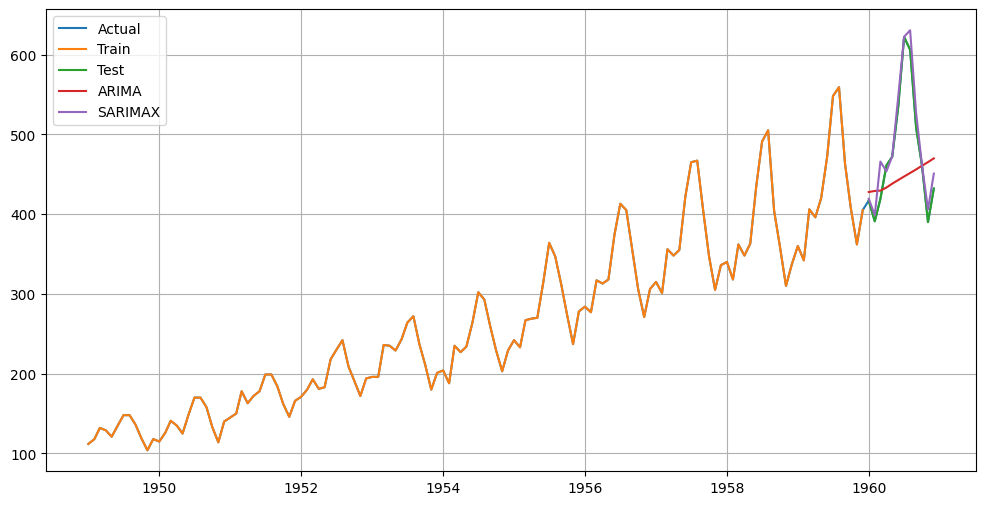

In [99]:
plt.figure(figsize = (12,6))
plt.plot(data, label = 'Actual')
plt.plot(np.exp(train), label = 'Train')
plt.plot(np.exp(test), label = 'Test')
plt.plot(arima_forecast, label = 'ARIMA')
plt.plot(sarimax_forecast, label = 'SARIMAX')
plt.grid()
plt.legend()